In [1]:
# Load the library
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py 
import cufflinks as cff
from numpy import sqrt,log
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import tensorflow

In [2]:
df=pd.read_csv("tcs_data2.csv")

In [3]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2012-05-22,TCS,EQ,1209.20,1221.0,1240.00,1213.00,1239.00,1224.05,1222.33,1180458,1.442907e+14,27043,705131,0.5973
1,2012-05-23,TCS,EQ,1224.05,1233.0,1235.55,1214.10,1220.90,1225.15,1224.11,1081403,1.323758e+14,35494,696897,0.6444
2,2012-05-24,TCS,EQ,1225.15,1225.0,1228.95,1207.10,1223.00,1221.45,1217.99,602837,7.342466e+13,35630,303432,0.5033
3,2012-05-25,TCS,EQ,1221.45,1212.1,1225.00,1209.10,1223.15,1220.80,1218.72,457523,5.575927e+13,27072,267766,0.5853
4,2012-05-28,TCS,EQ,1220.80,1224.0,1230.00,1215.05,1228.90,1224.70,1221.25,395097,4.825108e+13,18554,223269,0.5651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,2022-05-16,TCS,EQ,3414.90,3415.0,3430.00,3366.60,3385.00,3376.80,3399.01,1195813,4.064579e+14,84979,698049,0.5837
2471,2022-05-17,TCS,EQ,3376.80,3370.0,3467.00,3350.40,3466.75,3451.60,3410.54,1754076,5.982349e+14,126169,1022602,0.5830
2472,2022-05-18,TCS,EQ,3451.60,3465.0,3495.00,3443.05,3455.00,3448.80,3467.64,1866781,6.473332e+14,114108,1166592,0.6249
2473,2022-05-19,TCS,EQ,3448.80,3397.0,3405.00,3230.00,3271.90,3261.95,3300.30,4642963,1.532318e+15,377211,2952123,0.6358


In [4]:
#data structure
print(type(df))
df.shape

<class 'pandas.core.frame.DataFrame'>


(2475, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2475 non-null   object 
 1   Symbol              2475 non-null   object 
 2   Series              2475 non-null   object 
 3   Prev Close          2475 non-null   float64
 4   Open                2475 non-null   float64
 5   High                2475 non-null   float64
 6   Low                 2475 non-null   float64
 7   Last                2475 non-null   float64
 8   Close               2475 non-null   float64
 9   VWAP                2475 non-null   float64
 10  Volume              2475 non-null   int64  
 11  Turnover            2475 non-null   float64
 12  Trades              2475 non-null   int64  
 13  Deliverable Volume  2475 non-null   int64  
 14  %Deliverble         2475 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 290.2+

In [6]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03,2.475000e+03,2475.000000,2.475000e+03,2475.000000
mean,2381.531455,2383.193273,2407.999394,2357.136263,2382.484081,2382.373394,2382.705697,1.999562e+06,4.866117e+14,95476.522424,1.099564e+06,0.586049
std,604.647737,605.273762,609.809336,599.927660,604.628556,604.465431,604.762019,1.828393e+06,4.940570e+14,63002.706356,9.758135e+05,0.125392
min,1185.900000,1195.000000,1204.400000,1055.000000,1186.600000,1185.900000,1188.570000,2.801700e+04,4.173452e+12,1332.000000,7.765000e+03,0.121400
25%,2045.300000,2049.925000,2071.450000,2022.350000,2046.975000,2045.575000,2047.175000,9.315680e+05,2.035271e+14,50401.000000,5.734580e+05,0.505800
50%,2361.700000,2362.000000,2384.000000,2340.000000,2361.000000,2361.900000,2361.630000,1.532249e+06,3.489032e+14,80730.000000,9.021430e+05,0.595300
75%,2624.575000,2623.950000,2650.300000,2600.000000,2624.400000,2625.375000,2625.615000,2.544762e+06,6.255008e+14,123542.000000,1.384826e+06,0.681300
max,4019.150000,4033.950000,4043.000000,3980.000000,4025.000000,4019.150000,4010.330000,4.403358e+07,1.268362e+16,704881.000000,3.155626e+07,0.899300


In [7]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [8]:
df=df.rename(columns={"Deliverable Volume":"Deliverablevolume","%Deliverble":"Deliverable"})

In [9]:
df.duplicated().sum()

0

In [10]:
print(plt.style.available)
plt.style.use('seaborn-deep')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [11]:
df_open=pd.DataFrame()
df_open["TCS"]=pd.Series(df["Open"])
df_open["Date"]=pd.Series(df["Date"])

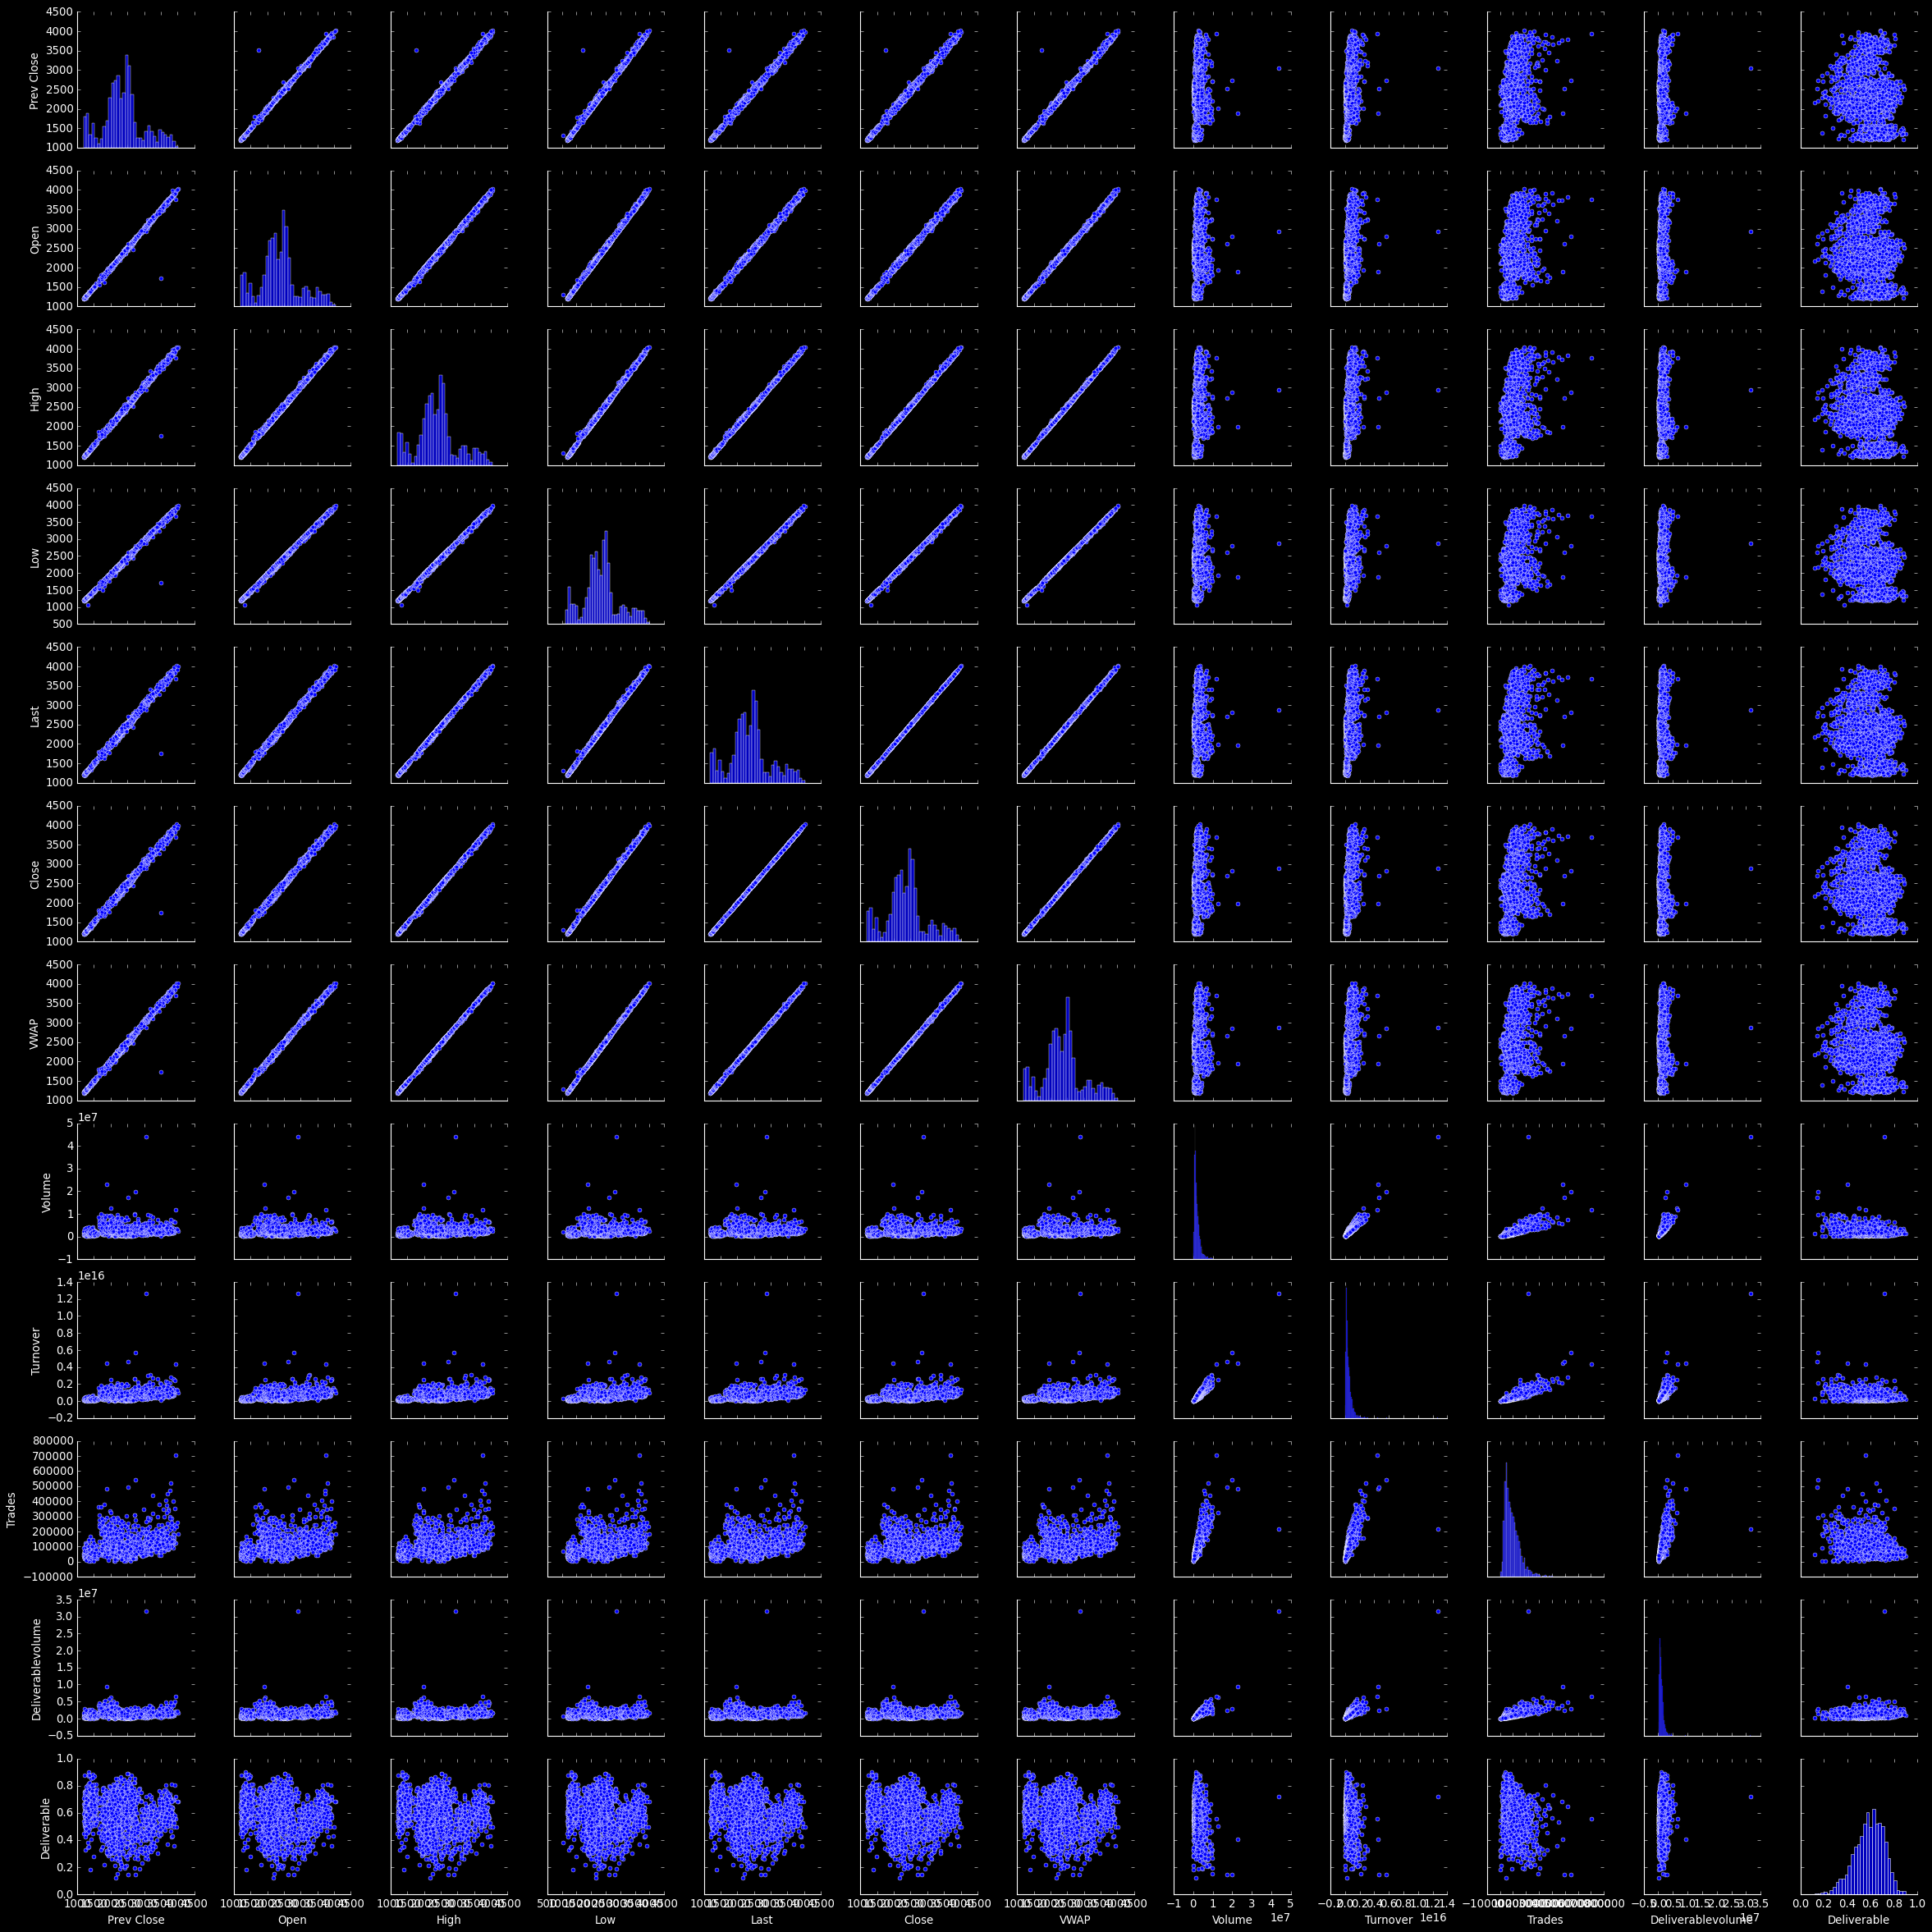

In [81]:
plt.rcParams["figure.figsize"]=(15,10)
sns.pairplot(df)

<AxesSubplot:>

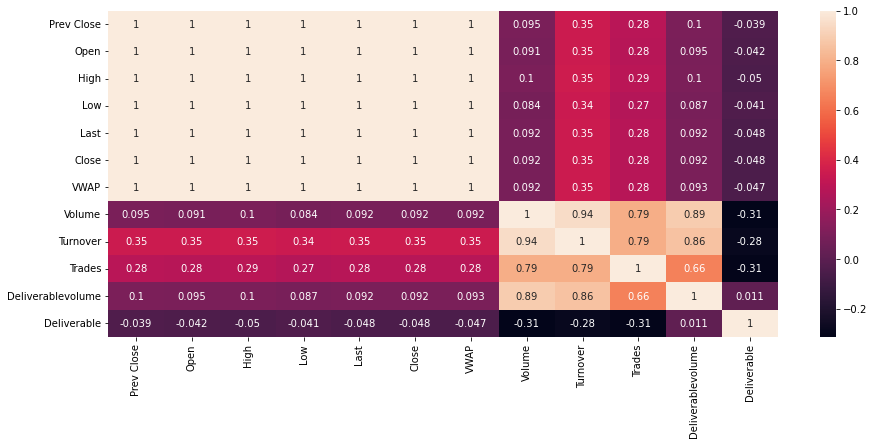

In [12]:
# Relaince Variables
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

## Opening price of the stock when the market opens

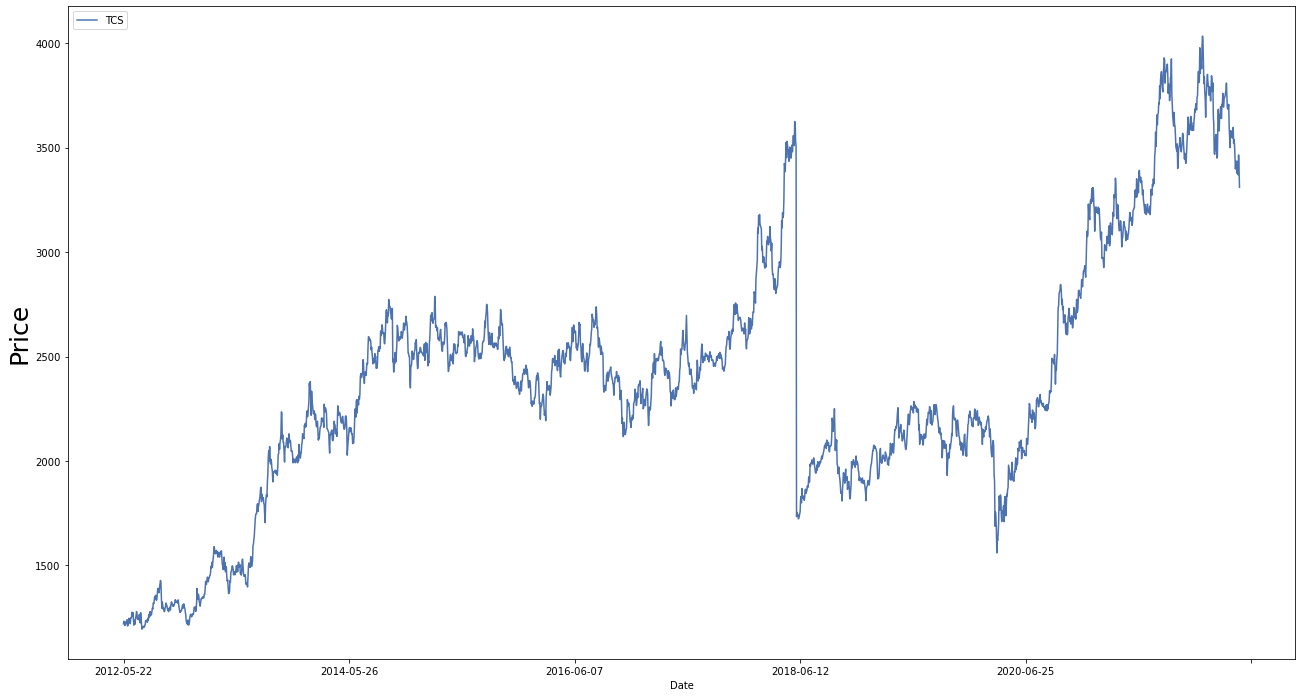

In [13]:
plt.rcParams["figure.figsize"]=(22,12)
df_open.plot(x="Date")
plt.ylabel("Price",size=25)
plt.legend(loc="upper left")

In [14]:
df_close=pd.DataFrame()
df_close["TCS"]=pd.Series(df["Close"])
df_close["Date"]=pd.Series(df["Date"])

In [15]:
plt.style.use("tableau-colorblind10")

## Closing price of the stock when the market closed

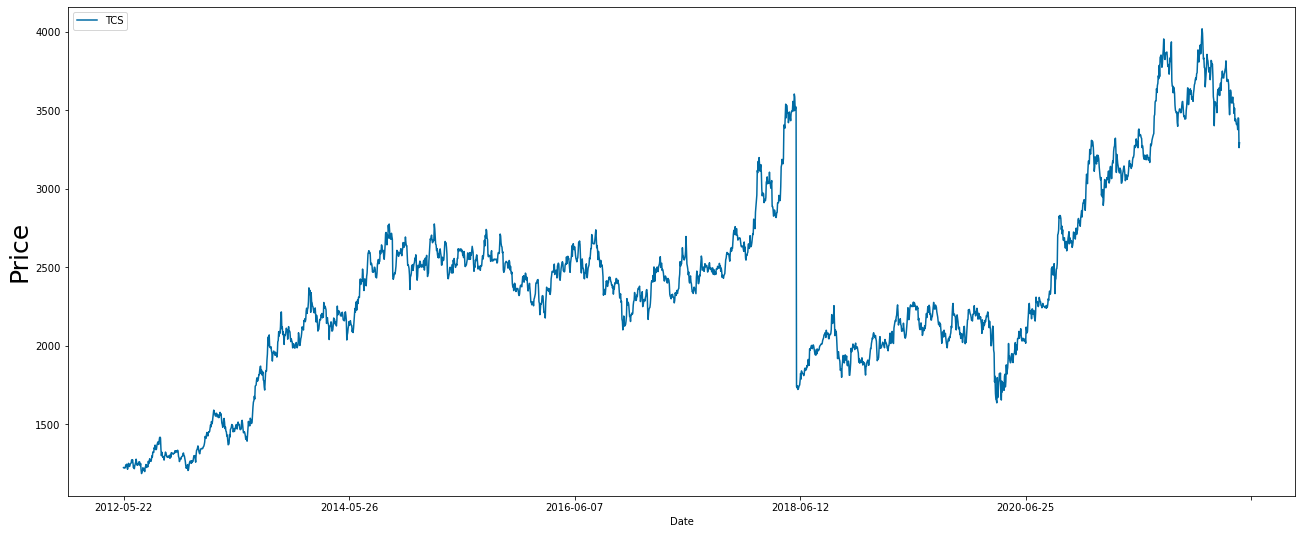

In [16]:
plt.rcParams["figure.figsize"]=(22,9)
df_close.plot(x="Date")
plt.ylabel("Price",size=25)
plt.legend(loc="upper left")

In [17]:
df_volume=pd.DataFrame()
df_volume["TCS"]=pd.Series(df["Volume"])
df_volume["Date"]=pd.Series(df["Date"])

## Total amount of stock traded on that day

Text(0, 0.5, 'Count')

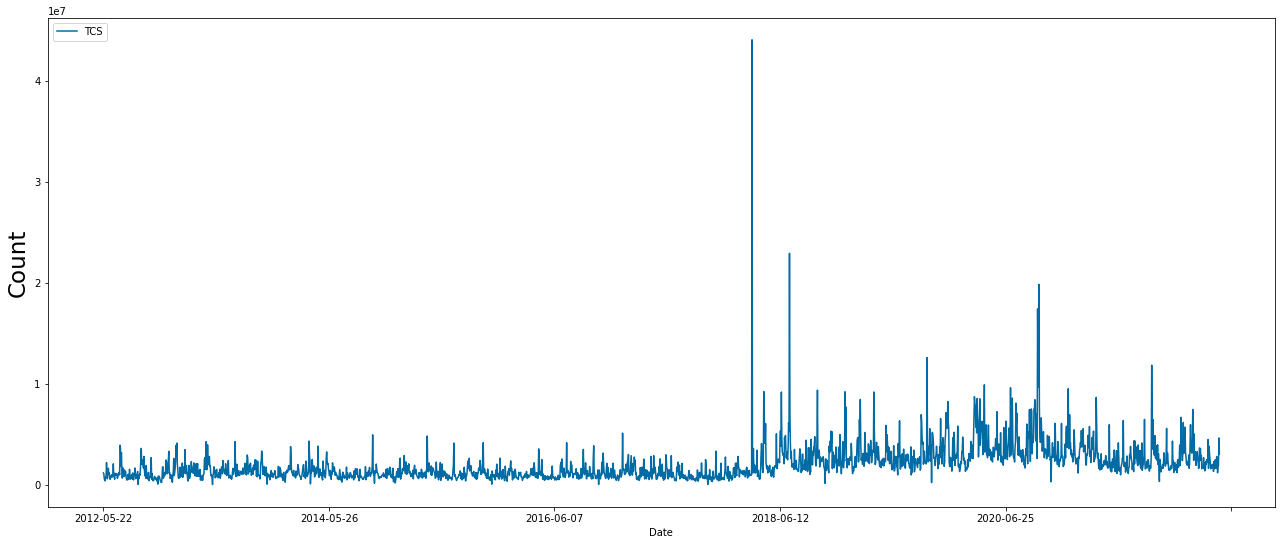

In [18]:
# Volume 
plt.style.use("tableau-colorblind10")
df_volume.plot(x="Date")
plt.legend(loc="upper left")
plt.ylabel("Count",size=23)

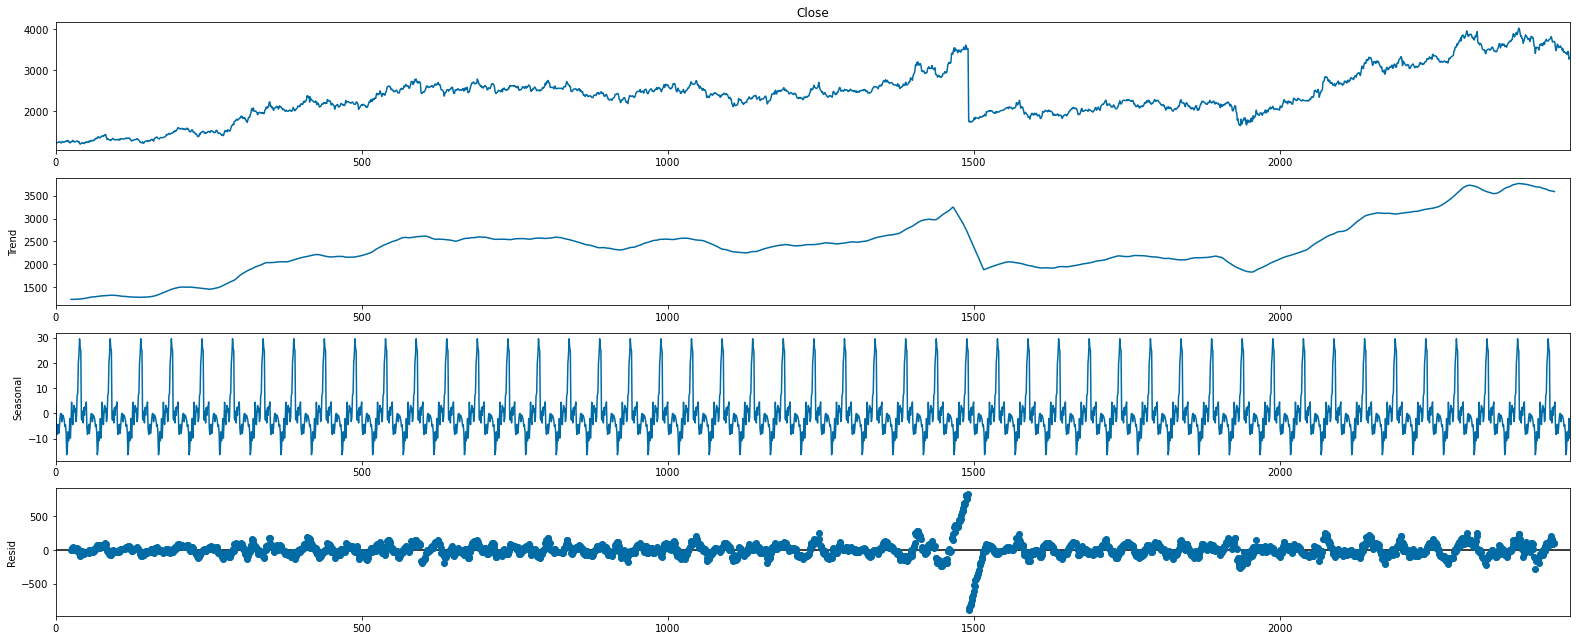

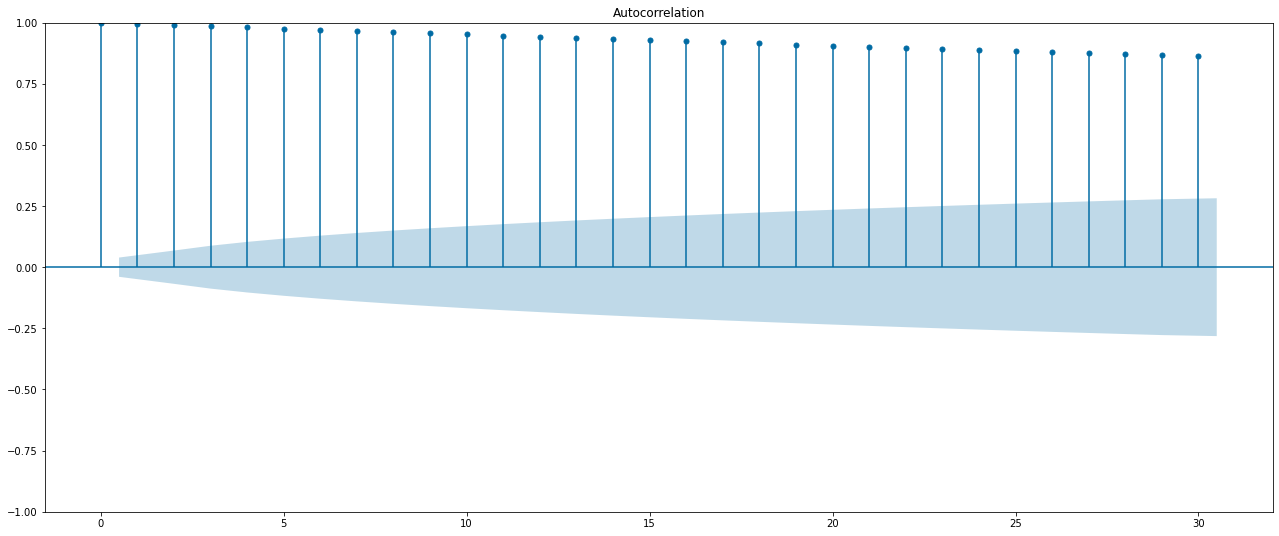

In [19]:
# To identify the Trend and Sesonality
df_seasonal=seasonal_decompose(df.Close,period=50)

df_seasonal.plot()
# ACF Plot - to identify the corrrlation 
plot_acf(df["Close"],lags=30)

plt.show()
plt.rcParams["figure.figsize"]=(12,4)

## Moving average

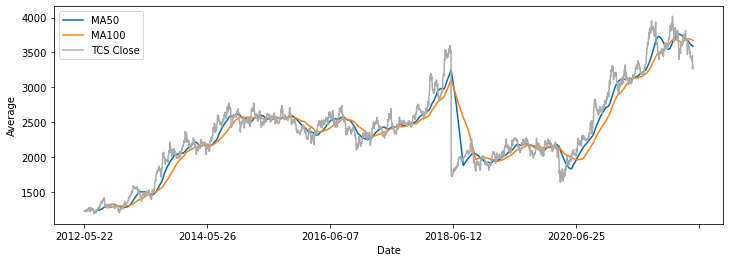

In [20]:
# Moving Average 
T_MA=pd.DataFrame()
T_MA["50"]=df["Close"].rolling(50).mean()
T_MA["100"]=df["Close"].rolling(100).mean()
T_MA["Date"]=df["Date"]
T_MA["Close"]=df["Close"]
T_MA=T_MA.set_index("Date")
label=["MA50","MA100","TCS Close"]
T_MA.plot()
plt.ylabel("Average")
plt.legend(label,loc="upper left")

In [21]:
py.offline.init_notebook_mode(connected=True)
cff.go_offline()

In [22]:
# TCS Year wise Average price
df_Quarter=pd.read_csv("tcs_data2.csv",parse_dates=["Date"],index_col="Date")
df_Quarter=df_Quarter.Close.resample('Y').mean()
df_Quarter.iplot(kind="line",color="black")

In [23]:
df_high=pd.DataFrame()
df_high["TCS"]=df.High
# TCS high prices

# Making Date as a Index 
df_high["Date"]=df.Date
df_high=df_high.set_index("Date")
df_high.iplot(kind="bar")

In [24]:
df_low=pd.DataFrame()
df_low["TCS"]=df.Low
# TCS low prices

# Making Date as a Index 
df_low["Date"]=df.Date
df_low=df_low.set_index("Date")
df_low.iplot(kind="bar")

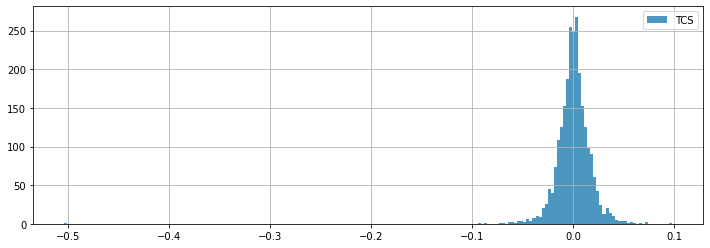

In [25]:
df_volatility=pd.DataFrame()
df_volatility["TCS"]=(df["Close"]/df["Close"].shift(1))-1
df_volatility["TCS"].hist(bins=200,alpha=0.7,label="TCS")
plt.legend()

In [26]:
df["High"].max(),df["Low"].max()

(4043.0, 3980.0)

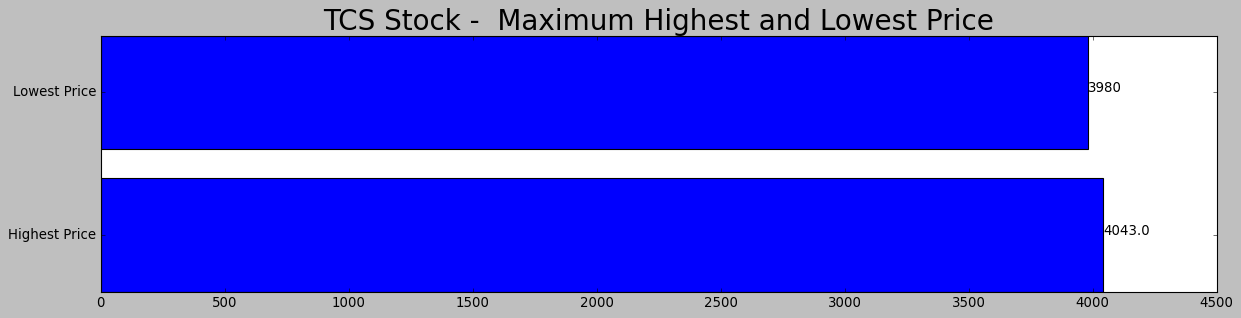

In [27]:
plt.style.use("classic")
plt.rcParams["figure.figsize"]=(18,4)
H_max_x = [4043.0,3980]
L_max_y = ["Highest Price","Lowest Price"]

plt.barh(L_max_y,H_max_x)
plt.title("TCS Stock -  Maximum Highest and Lowest Price",size=25)
 
for index, value in enumerate(H_max_x):
    plt.text(value, index,
             str(value))

## High vs Low - TCS

In [28]:
plt.style.use("dark_background")
h_l_tcs=pd.DataFrame()
h_l_tcs["tcs_high"]=pd.Series(df.High)
h_l_tcs["tcs_low"]=pd.Series(df.Low)
h_l_tcs["Date"]=df.Date
h_l_tcs=h_l_tcs.set_index(["Date"])
h_l_tcs.iplot(kind="bar",color=["green","lightgreen"])

## Preprocessing

In [29]:
df_df=df.drop(["Symbol","Series","Prev Close","VWAP","Trades","Deliverablevolume","Deliverable","Turnover"],axis=1)
df_df

,Date,Open,High,Low,Last,Close,Volume
0,2012-05-22,1221.0,1240.00,1213.00,1239.00,1224.05,1180458
1,2012-05-23,1233.0,1235.55,1214.10,1220.90,1225.15,1081403
2,2012-05-24,1225.0,1228.95,1207.10,1223.00,1221.45,602837
3,2012-05-25,1212.1,1225.00,1209.10,1223.15,1220.80,457523
4,2012-05-28,1224.0,1230.00,1215.05,1228.90,1224.70,395097
...,...,...,...,...,...,...,...
2470,2022-05-16,3415.0,3430.00,3366.60,3385.00,3376.80,1195813
2471,2022-05-17,3370.0,3467.00,3350.40,3466.75,3451.60,1754076
2472,2022-05-18,3465.0,3495.00,3443.05,3455.00,3448.80,1866781
2473,2022-05-19,3397.0,3405.00,3230.00,3271.90,3261.95,4642963


In [30]:
df_close_sqrt=sqrt(df_df["Close"])
df_close_log=log(df_df["Close"])

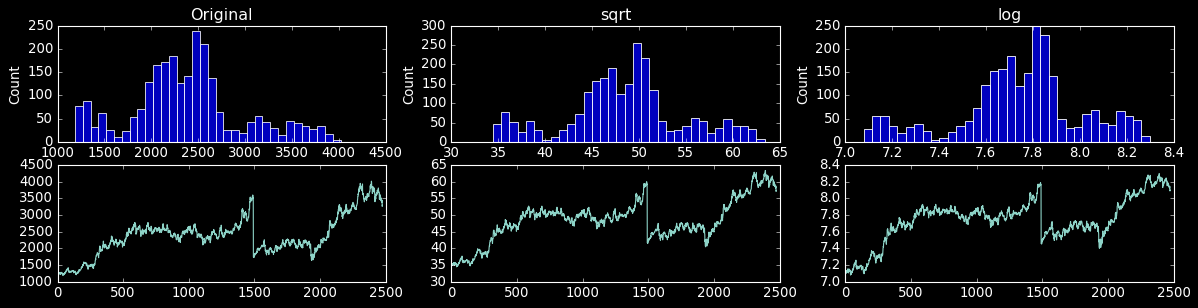

In [31]:
fig,ax=plt.subplots(2,3)
sns.histplot(df["Close"],ax=ax[0,0]) ; ax[0,0].set_title("Original")
#ax[1]=plt.plot(df1["Close"])
ax[1,0].plot(df_df.Close)
plt.rcParams["figure.figsize"]=(18,9)
sns.histplot(df_close_sqrt,ax=ax[0,1]) ; ax[0,1].set_title("sqrt")
ax[1,1].plot(df_close_sqrt)
sns.histplot(df_close_log,ax=ax[0,2]) ; ax[0,2].set_title("log")
ax[1,2].plot(df_close_log)

In [32]:
# dicky fuller test
adft=adfuller(df_close_log)
output=pd.Series(adft[0:4],index=["t-value","p-value","no.of.lags","no.of.observations"])
output

t-value                 -2.472725
p-value                  0.122252
no.of.lags               0.000000
no.of.observations    2474.000000
dtype: float64

## Model Building 

In [33]:
train=df_close_log.iloc[0:int(len(df_close_log)*.80)]
test=df_close_log.iloc[int(len(df_close_log)*.80):int(len(df_close_log))]

In [34]:
train.shape,test.shape

((1980,), (495,))

In [35]:
# 1.Simple Exponential Smoothing
decimals=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
best_one=[]
for i in range(len(decimals)):
    model=SimpleExpSmoothing(train).fit(smoothing_level=decimals[i])
    preds=model.predict(start=test.index[0],end=test.index[-1])
    best_one.append(mean_absolute_error(preds,test))
for j in range(len(decimals)):
    print(decimals[j],":",best_one[j])

0.1 : 0.4662204692607713
0.2 : 0.4496522674521869
0.3 : 0.443603872304639
0.4 : 0.44037537578220626
0.5 : 0.43840616351645945
0.6 : 0.43698851442252784
0.7 : 0.4356433967386835
0.8 : 0.4340344185439109
0.9 : 0.4319265097764256
1.0 : 0.4291576222850159


In [36]:
# 2. Simple Exponential Smoothing
df_model1=SimpleExpSmoothing(train).fit(smoothing_level=1.0)
df_preds1=df_model1.predict(start=test.index[0],end=test.index[-1])
df_error1=mean_absolute_error(df_preds1,test)
df_error1

0.4291576222850159

In [37]:
# 2. Advance Exponential Smoothing ( HOLT )
decimals=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
best_one=[]
for i in range(len(decimals)):
    model=Holt(train).fit(smoothing_level=1.0,smoothing_trend=decimals[i])
    preds=model.predict(start=test.index[0],end=test.index[-1])
    best_one.append(mean_absolute_error(preds,test))
for j in range(len(decimals)):
    print(decimals[j],":",best_one[j])

0.1 : 0.5942913852649288
0.2 : 0.8459179204980724
0.3 : 1.1128091045194222
0.4 : 1.4334384817515236
0.5 : 1.8743562182735414
0.6 : 2.4965737836783193
0.7 : 3.3404093377672033
0.8 : 4.430326465912986
0.9 : 5.7806563892229
1.0 : 7.39791660046919


In [38]:
# 2. Advance Exponential Smoothing ( HOLT )
df_model2=Holt(train).fit(smoothing_level=1.0,smoothing_trend=0.1)
df_preds2=df_model2.predict(start=test.index[0],end=test.index[-1])
df_error2=mean_absolute_error(df_preds2,test)
df_error2

0.5942913852649288

In [39]:
# 3. Holt's winter additive trend and aditive sesonality
df_model3=ExponentialSmoothing(train,trend="add",seasonal="add",seasonal_periods=12).fit()
df_preds3=df_model3.predict(start=test.index[0],end=test.index[-1])
df_error3=mean_absolute_error(df_preds3,test)
df_error3

0.3657439635656676

In [40]:
# 4. Holt's winter additive trend and multiplicative sesonality
df_model4=ExponentialSmoothing(train,trend="add",seasonal="mul",seasonal_periods=12).fit()
df_preds4=df_model4.predict(start=test.index[0],end=test.index[-1])
df_error4=mean_absolute_error(df_preds4,test)
df_error4

0.3667952112209455

In [41]:
# 6. Auto Regressive
df_model5 = AutoReg(train, lags=10).fit()
print(df_model5.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1980
Model:                    AutoReg(10)   Log Likelihood                4707.117
Method:               Conditional MLE   S.D. of innovations              0.022
Date:                Fri, 25 Nov 2022   AIC                          -9390.234
Time:                        10:12:20   BIC                          -9323.205
Sample:                            10   HQIC                         -9365.603
                                 1980                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0483      0.017      2.829      0.005       0.015       0.082
Close.L1       0.9927      0.023     44.065      0.000       0.949       1.037
Close.L2      -0.0024      0.032     -0.074      0.9

In [42]:
len(train)

1980

In [43]:
df_preds5 = df_model5.predict(start=len(train), end=2474, dynamic=False)
df_error5=mean_absolute_error(df_preds5,test)
df_error5

0.3542149711497206

In [44]:
test.shape

(495,)

In [45]:
# 6. ARIMA Method
df_model6 = ARIMA(train, order=(3,1,0))
df_model6 = df_model6.fit()
a=df_model6.forecast(495)
d=pd.Series(a,index=test.index)
df_error6=mean_absolute_error(d,test)
df_error6

0.4290529532615201

In [46]:
# 8. LSTM

#df_lstm=pd.DataFrame()
#df_lstm["1_day_back_price"]=df_close_log.shift(1)
#df_lstm["2_day_back_price"]=df_close_log.shift(2)
#df_lstm["3_day_back_price"]=df_close_log.shift(3)
#df_lstm["close"]=df_close_log
#df_lstm["Date"]=df_df["Date"]
#df_lstm=df_lstm.set_index(["Date"])
#df_lstm=df_lstm.dropna()
#df_lstm_x=df_lstm.drop(["close"],axis=1)
#df_lstm_y=df_lstm[["close"]]
#df_lstm_close=np.array(df_close_log).reshape(-1,1)

#df_lstm_x=np.array(df_lstm_x).reshape(-1,1)
#df_lstm_y=np.array(df_lstm_y).reshape(-1,1)

#df_lstm_xtrain=df_lstm_x[:1980]
#df_lstm_xtest=df_lstm_x[1980:]
#df_lstm_ytrain=df_lstm_y[:1980]
#df_lstm_ytest=df_lstm_y[1980:]

normalizing=MinMaxScaler(feature_range=(0,1))
df_lstm=normalizing.fit_transform(np.array(df_close_log).reshape(-1,1))

train_data=int(len(df_lstm)*0.80)
test_data=len(df_lstm)-train_data
train_data,test_data

(1980, 495)

In [47]:
df_lstm_train,df_lstm_test=df_lstm[0:train_data,:],df_lstm[train_data:len(df_lstm),:]

In [48]:
len(df_lstm_train),len(df_lstm_test)

(1980, 495)

In [49]:
def create_df(dataset,step):
    xxtrain,yytrain=[],[]
    for i in range(len(dataset)-step-1):
        a=dataset[i:(i+step),0]
        xxtrain.append(a)
        yytrain.append(dataset[i+step,0])
    return np.array(xxtrain),np.array(yytrain)    

In [50]:
t_s=100
df_lstm_xtrain,df_lstm_ytrain=(create_df(df_lstm_train,t_s))
df_lstm_xtest,df_lstm_ytest=(create_df(df_lstm_test,t_s))

In [51]:
df_lstm_xtrain.shape,df_lstm_ytrain.shape,df_lstm_xtest.shape,df_lstm_ytest.shape

((1879, 100), (1879,), (394, 100), (394,))

In [52]:
n_features=1
df_lstm_xtrain=df_lstm_xtrain.reshape(df_lstm_xtrain.shape[0],df_lstm_xtrain.shape[1],n_features)
df_lstm_xtest=df_lstm_xtest.reshape(df_lstm_xtest.shape[0],df_lstm_xtest.shape[1],n_features)

In [53]:
df_model7 = Sequential()
df_model7.add(LSTM(50,return_sequences=True,input_shape=(df_lstm_xtrain.shape[1],1)))
df_model7.add(LSTM(50,return_sequences=True))
df_model7.add(LSTM(50))
df_model7.add(Dense(1,activation='linear')) 
df_model7.compile(optimizer="adam",loss="MAE")
df_model7.fit(df_lstm_xtrain,df_lstm_ytrain,validation_data=(df_lstm_xtest,df_lstm_ytest),epochs=10,batch_size=64)

Epoch 1/10
30/30 [==============================] - 25s 374ms/step - loss: 0.1130 - val_loss: 0.0552
Epoch 2/10
30/30 [==============================] - 8s 269ms/step - loss: 0.0346 - val_loss: 0.0266
Epoch 3/10
30/30 [==============================] - 7s 250ms/step - loss: 0.0307 - val_loss: 0.0252
Epoch 4/10
30/30 [==============================] - 8s 258ms/step - loss: 0.0290 - val_loss: 0.0390
Epoch 5/10
30/30 [==============================] - 8s 269ms/step - loss: 0.0276 - val_loss: 0.0446
Epoch 6/10
30/30 [==============================] - 8s 266ms/step - loss: 0.0254 - val_loss: 0.0194
Epoch 7/10
30/30 [==============================] - 8s 269ms/step - loss: 0.0255 - val_loss: 0.0426
Epoch 8/10
30/30 [==============================] - 8s 277ms/step - loss: 0.0242 - val_loss: 0.0261
Epoch 9/10
30/30 [==============================] - 8s 268ms/step - loss: 0.0218 - val_loss: 0.0213
Epoch 10/10
30/30 [==============================] - 8s 264ms/step - loss: 0.0214 - val_loss: 0.042

In [54]:
df_preds7=df_model7.predict(df_lstm_xtest)
df_error7=mean_absolute_error(df_preds7,df_lstm_ytest)
df_error7

13/13 [==============================] - 4s 52ms/step


0.042129312665813934

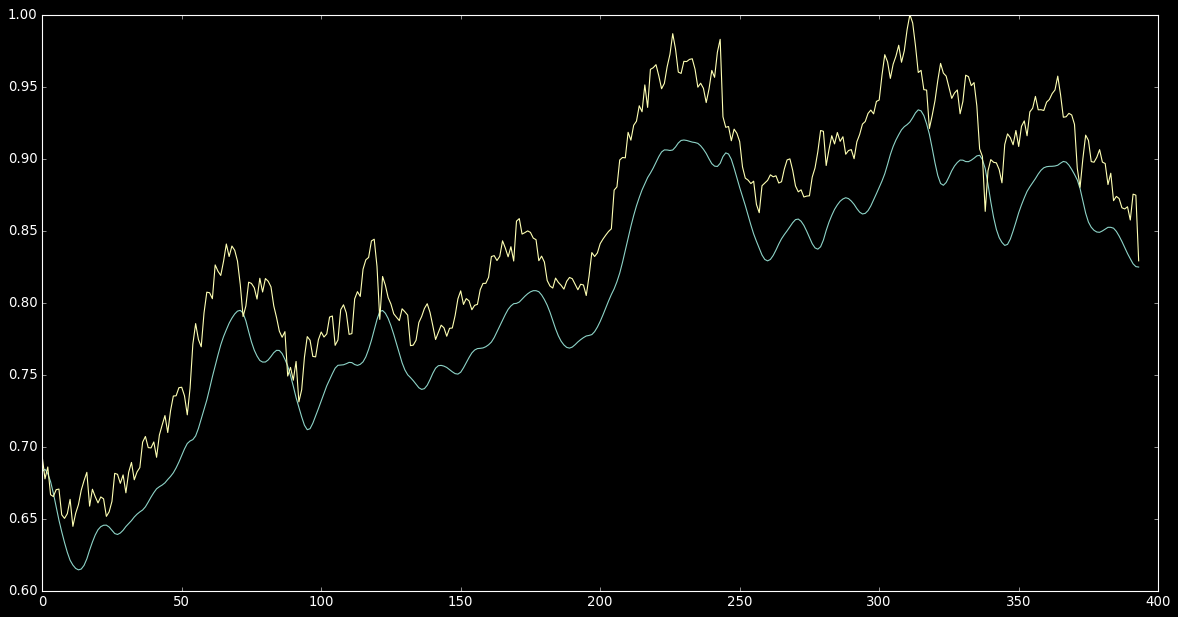

In [55]:
plt.plot(df_preds7)
plt.plot(df_lstm_ytest)

In [56]:
df_lstm_ytest.shape

(394,)

In [57]:
fut_inp=df_lstm_ytest[294:]
fut_inp=fut_inp.reshape(1,-1)

In [58]:
temp_inp=list(fut_inp)
fut_inp.shape

(1, 100)

In [59]:
temp_inp=temp_inp[0].tolist()

In [60]:
#n=int(input("Enter the number"))
lst_out=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_inp)>100):
        fut_inp=np.array(temp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp=fut_inp.reshape((1,n_steps,1))
        yhat=df_model7.predict(fut_inp,verbose=0)
        temp_inp.extend(yhat[0].tolist())
        temp_inp=temp_inp[1:]
        lst_out.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp=fut_inp.reshape((1,n_steps,1))
        yhat=df_model7.predict(fut_inp,verbose=0)
        temp_inp.extend(yhat[0].tolist())
        lst_out.extend(yhat.tolist())
        i=i+1
               
    print(lst_out) 

[[0.8225318789482117]]
[[0.8225318789482117], [0.8178943395614624]]
[[0.8225318789482117], [0.8178943395614624], [0.8111280798912048]]
[[0.8225318789482117], [0.8178943395614624], [0.8111280798912048], [0.8028601408004761]]
[[0.8225318789482117], [0.8178943395614624], [0.8111280798912048], [0.8028601408004761], [0.7936710715293884]]
[[0.8225318789482117], [0.8178943395614624], [0.8111280798912048], [0.8028601408004761], [0.7936710715293884], [0.7840054631233215]]
[[0.8225318789482117], [0.8178943395614624], [0.8111280798912048], [0.8028601408004761], [0.7936710715293884], [0.7840054631233215], [0.7741690278053284]]
[[0.8225318789482117], [0.8178943395614624], [0.8111280798912048], [0.8028601408004761], [0.7936710715293884], [0.7840054631233215], [0.7741690278053284], [0.7643613219261169]]
[[0.8225318789482117], [0.8178943395614624], [0.8111280798912048], [0.8028601408004761], [0.7936710715293884], [0.7840054631233215], [0.7741690278053284], [0.7643613219261169], [0.7547120451927185]]
[

[[0.8225318789482117], [0.8178943395614624], [0.8111280798912048], [0.8028601408004761], [0.7936710715293884], [0.7840054631233215], [0.7741690278053284], [0.7643613219261169], [0.7547120451927185], [0.7453061938285828], [0.7362058758735657], [0.7274569272994995], [0.7190951704978943], [0.711148202419281], [0.7036343812942505], [0.6965643167495728], [0.6899391412734985], [0.6837522387504578], [0.6779894828796387], [0.6726296544075012], [0.6676465272903442], [0.6630088090896606], [0.6586829423904419], [0.6546325087547302], [0.6508205533027649], [0.6472097635269165], [0.6437637805938721], [0.6404476761817932], [0.6372287273406982]]
[[0.8225318789482117], [0.8178943395614624], [0.8111280798912048], [0.8028601408004761], [0.7936710715293884], [0.7840054631233215], [0.7741690278053284], [0.7643613219261169], [0.7547120451927185], [0.7453061938285828], [0.7362058758735657], [0.7274569272994995], [0.7190951704978943], [0.711148202419281], [0.7036343812942505], [0.6965643167495728], [0.6899391

In [61]:
np.exp(normalizing.inverse_transform(lst_out))

array([[3236.38979166],
       [3218.12217   ],
       [3191.6541646 ],
       [3159.60728707],
       [3124.36747758],
       [3087.7242126 ],
       [3050.87451607],
       [3014.57030112],
       [2979.27414947],
       [2945.2662231 ],
       [2912.73251827],
       [2881.79383504],
       [2852.53154964],
       [2824.99627064],
       [2799.20629635],
       [2775.15447865],
       [2752.80373808],
       [2732.09412897],
       [2712.94444818],
       [2695.25419193],
       [2678.91074095],
       [2663.78919731],
       [2649.7614126 ],
       [2636.6937673 ],
       [2624.45437906],
       [2612.91329216],
       [2601.94630717],
       [2591.43612956],
       [2581.2744886 ],
       [2571.36239147]])

In [62]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

In [63]:
df_lstm.shape,len(lst_out)

((2475, 1), 30)

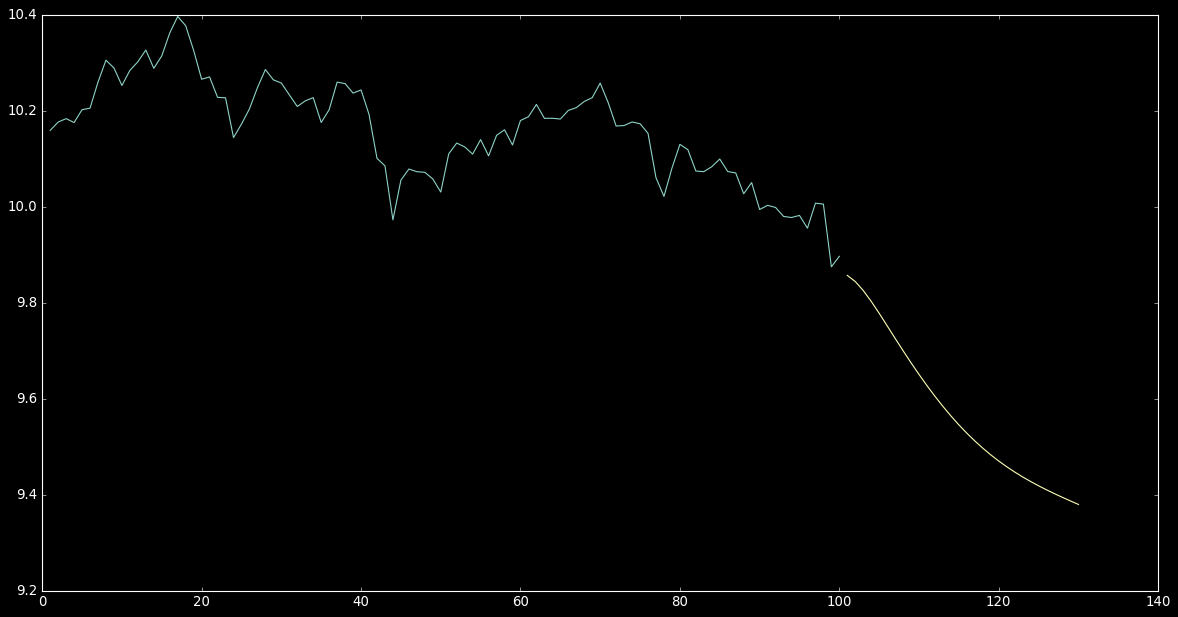

In [64]:
plt.plot(plot_new,normalizing.inverse_transform(np.exp(df_lstm[2375:])))
plt.plot(plot_pred,normalizing.inverse_transform(np.exp(lst_out)))

59/59 [==============================] - 3s 56ms/step


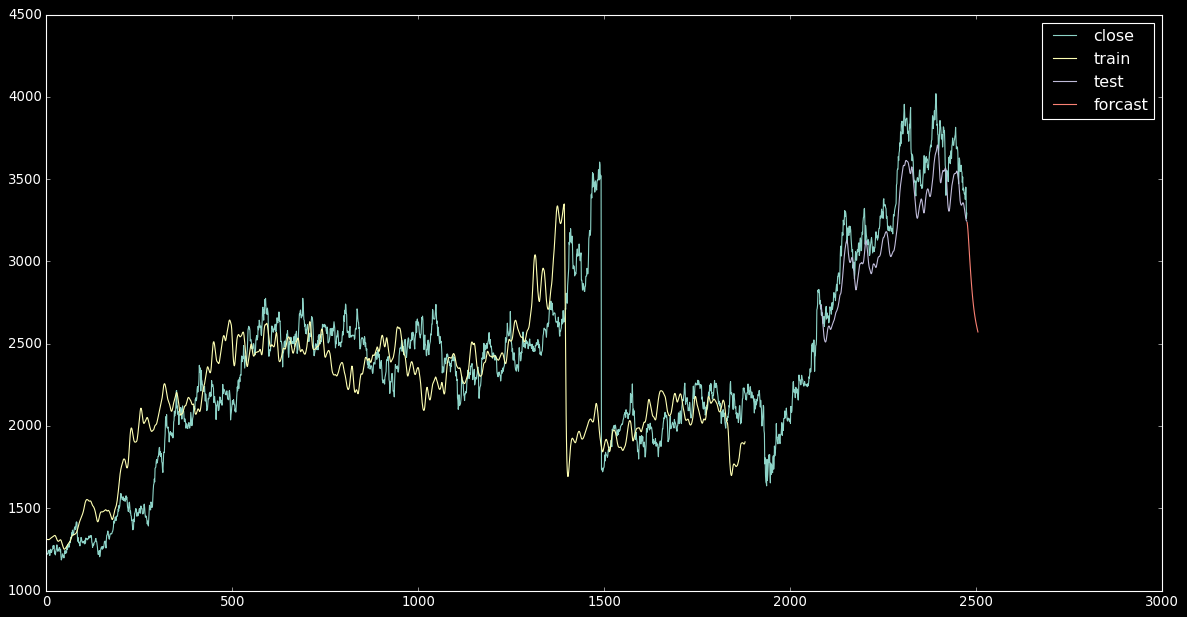

In [65]:
ranges1=np.arange(2081,2475)
ranges2=np.arange(2475,2505)
t1=np.exp(normalizing.inverse_transform(df_lstm))
t2=np.exp(normalizing.inverse_transform(df_model7.predict(df_lstm_xtrain)))
t3=np.exp(normalizing.inverse_transform(df_preds7))
t4=np.exp(normalizing.inverse_transform(lst_out))
plt.plot(t1)
plt.plot(t2)
plt.plot(ranges1,t3)
plt.plot(ranges2,t4)
label=["close","train","test","forcast"]
plt.legend(label)

In [66]:
df_models=dict()
df_models["SES"]=1-df_error1
df_models["AES (HOLT'S)"]=1-df_error2
df_models["AES add(trend,sesonal)"]=1-df_error3
df_models["AES add(trend),mul(sesonal)"]=1-df_error4
df_models["AutoRegressive"]=1-df_error5
df_models["ARIMA"]=1-df_error6
df_models["LSTM"]=1-df_error7

In [67]:
df_models=pd.DataFrame(list(df_models.items()),columns=["Model","Accuracy"])
df_models

,Model,Accuracy
0,SES,0.570842
1,AES (HOLT'S),0.405709
2,"AES add(trend,sesonal)",0.634256
3,"AES add(trend),mul(sesonal)",0.633205
4,AutoRegressive,0.645785
5,ARIMA,0.570947
6,LSTM,0.957871


In [68]:
df_models=df_models.sort_values("Accuracy",ascending=False)
df_models

,Model,Accuracy
6,LSTM,0.957871
4,AutoRegressive,0.645785
2,"AES add(trend,sesonal)",0.634256
3,"AES add(trend),mul(sesonal)",0.633205
5,ARIMA,0.570947
0,SES,0.570842
1,AES (HOLT'S),0.405709


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

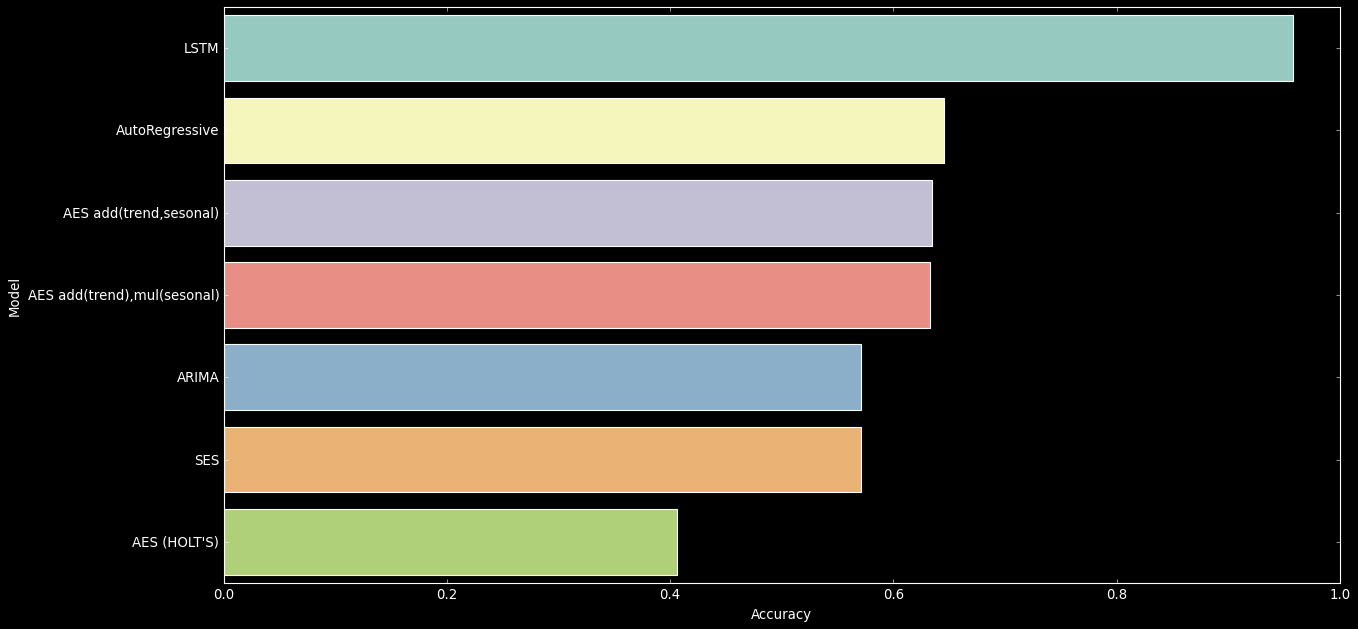

In [69]:
sns.barplot(x="Accuracy",y="Model",data=df_models)

## Finalize Model for TCS is ( LSTM ) - supply entire data init

In [70]:
df_x,df_y=create_df(df_lstm,t_s)
df_x.shape,df_y.shape

((2374, 100), (2374,))

In [71]:
df_x=df_x.reshape(df_x.shape[0],df_x.shape[1],n_features)

In [72]:
df_model = Sequential()
df_model.add(LSTM(50,return_sequences=True,input_shape=(df_x.shape[1],1)))
df_model.add(LSTM(50,return_sequences=True))
df_model.add(LSTM(50))
df_model.add(Dense(1,activation='linear')) 
df_model.compile(optimizer="adam",loss="MAE")
df_model.fit(df_x,df_y,epochs=10,batch_size=64)

Epoch 1/10
38/38 [==============================] - 23s 244ms/step - loss: 0.1236
Epoch 2/10
38/38 [==============================] - 9s 235ms/step - loss: 0.0311
Epoch 3/10
38/38 [==============================] - 11s 291ms/step - loss: 0.0325
Epoch 4/10
38/38 [==============================] - 10s 252ms/step - loss: 0.0280
Epoch 5/10
38/38 [==============================] - 9s 239ms/step - loss: 0.0268
Epoch 6/10
38/38 [==============================] - 9s 242ms/step - loss: 0.0263
Epoch 7/10
38/38 [==============================] - 9s 246ms/step - loss: 0.0243
Epoch 8/10
38/38 [==============================] - 9s 244ms/step - loss: 0.0224
Epoch 9/10
38/38 [==============================] - 9s 244ms/step - loss: 0.0220
Epoch 10/10
38/38 [==============================] - 10s 257ms/step - loss: 0.0239


In [73]:
df_y.shape

(2374,)

In [74]:
fut_inp_=df_y[2274:]
fut_inp_=fut_inp_.reshape(1,-1)
temp_inp_=list(fut_inp_)
fut_inp_.shape

(1, 100)

In [75]:
temp_inp_=temp_inp_[0].tolist()

In [76]:
lst_out_=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_inp_)>100):
        fut_inp_=np.array(temp_inp_[1:])
        fut_inp_=fut_inp_.reshape(1,-1)
        fut_inp_=fut_inp_.reshape((1,n_steps,1))
        yhat=df_model.predict(fut_inp_,verbose=0)
        temp_inp_.extend(yhat[0].tolist())
        temp_inp_=temp_inp_[1:]
        lst_out_.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp_=fut_inp_.reshape((1,n_steps,1))
        yhat=df_model.predict(fut_inp_,verbose=0)
        temp_inp_.extend(yhat[0].tolist())
        lst_out_.extend(yhat.tolist())
        i=i+1
               
    print(lst_out_) 

[[0.8949549794197083]]
[[0.8949549794197083], [0.8947861194610596]]
[[0.8949549794197083], [0.8947861194610596], [0.8972511887550354]]
[[0.8949549794197083], [0.8947861194610596], [0.8972511887550354], [0.9020254611968994]]
[[0.8949549794197083], [0.8947861194610596], [0.8972511887550354], [0.9020254611968994], [0.9085560441017151]]
[[0.8949549794197083], [0.8947861194610596], [0.8972511887550354], [0.9020254611968994], [0.9085560441017151], [0.9162870645523071]]
[[0.8949549794197083], [0.8947861194610596], [0.8972511887550354], [0.9020254611968994], [0.9085560441017151], [0.9162870645523071], [0.924759030342102]]
[[0.8949549794197083], [0.8947861194610596], [0.8972511887550354], [0.9020254611968994], [0.9085560441017151], [0.9162870645523071], [0.924759030342102], [0.933632493019104]]
[[0.8949549794197083], [0.8947861194610596], [0.8972511887550354], [0.9020254611968994], [0.9085560441017151], [0.9162870645523071], [0.924759030342102], [0.933632493019104], [0.9426715970039368]]
[[0.89

[[0.8949549794197083], [0.8947861194610596], [0.8972511887550354], [0.9020254611968994], [0.9085560441017151], [0.9162870645523071], [0.924759030342102], [0.933632493019104], [0.9426715970039368], [0.9517186284065247], [0.9606671333312988], [0.9694423079490662], [0.9779883623123169], [0.9862611293792725], [0.9942256212234497], [1.0018538236618042], [1.009125828742981], [1.0160287618637085], [1.022557258605957], [1.0287134647369385], [1.034505844116211], [1.0399501323699951], [1.0450658798217773], [1.049877405166626], [1.0544114112854004], [1.0586990118026733], [1.0627708435058594], [1.0666589736938477], [1.0703953504562378]]
[[0.8949549794197083], [0.8947861194610596], [0.8972511887550354], [0.9020254611968994], [0.9085560441017151], [0.9162870645523071], [0.924759030342102], [0.933632493019104], [0.9426715970039368], [0.9517186284065247], [0.9606671333312988], [0.9694423079490662], [0.9779883623123169], [0.9862611293792725], [0.9942256212234497], [1.0018538236618042], [1.0091258287429

In [77]:
np.exp(normalizing.inverse_transform(lst_out_))

array([[3535.50377128],
       [3534.77516087],
       [3545.42655812],
       [3566.14723015],
       [3594.68666668],
       [3628.76753648],
       [3666.48590109],
       [3706.41221907],
       [3747.5309023 ],
       [3789.14241679],
       [3830.7552658 ],
       [3872.00585843],
       [3912.60630783],
       [3952.31390197],
       [3990.92252277],
       [4028.25450239],
       [4064.16835844],
       [4098.55568063],
       [4131.34539667],
       [4162.50554256],
       [4192.03871496],
       [4219.98810335],
       [4246.42065349],
       [4271.43238853],
       [4295.13630139],
       [4317.67300026],
       [4339.18502891],
       [4359.82656625],
       [4379.75497836],
       [4399.12858657]])

In [78]:
df_entire_data=df_lstm.tolist()
df_entire_data.extend(lst_out_)

In [79]:
len(df_entire_data)

2505

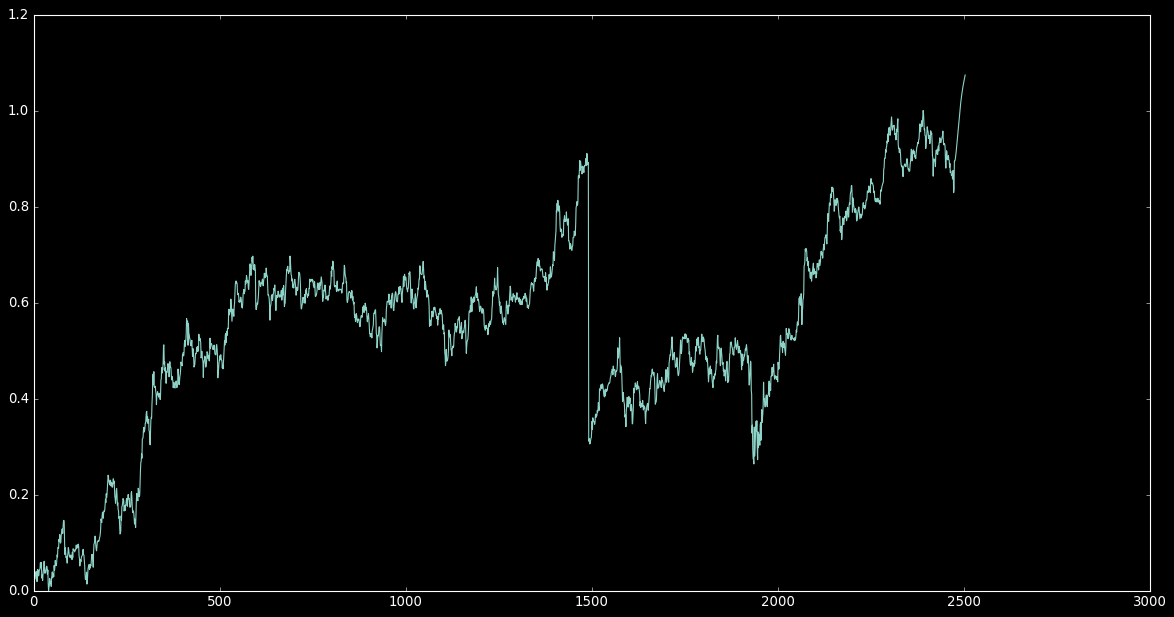

In [80]:
plt.plot(df_entire_data)

## Generating file for Deployment

In [82]:
df_model.save("tcs_model2.h5")